

```
# This is formatted as code
```

#Exploratory Data Analysis (EDA)


> Textual Analysis (Statistics)


> Visual Analysis (Visualizations)








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
url = '/content/COMP 1886 - Coursework dataset.xlsx'
dataset = pd.read_excel(url)

# Textual Stats

# Dataset information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 1447 non-null   datetime64[ns]
 1   Sector                               1365 non-null   object        
 2   Gender                               1401 non-null   object        
 3   Region                               1447 non-null   object        
 4   Miscellaneous (£)                    1432 non-null   float64       
 5   Automotive Fuel (£)                  1447 non-null   float64       
 6   Entertainment (£)                    1417 non-null   float64       
 7   Food and Drink (£)                   1447 non-null   float64       
 8   Pubs, restaurants and fast food (£)  1447 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 101.9+ KB
None


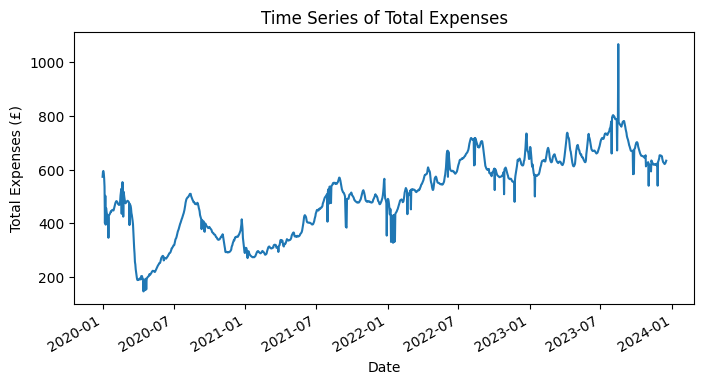

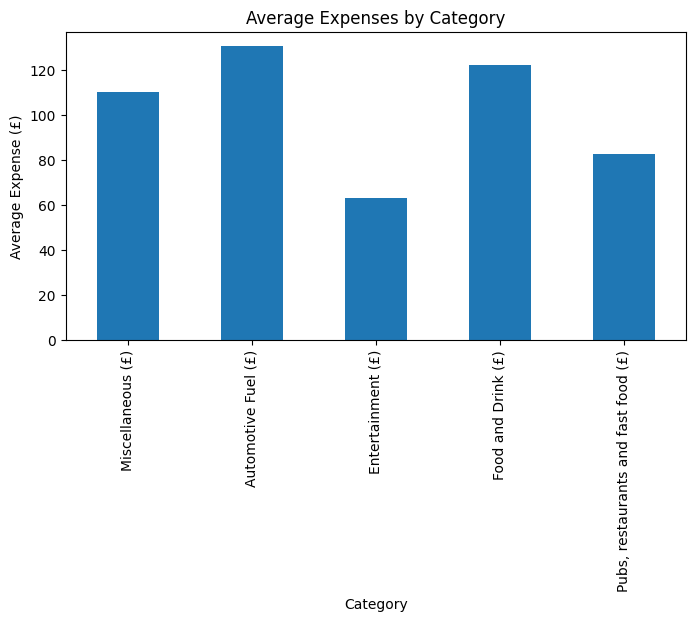

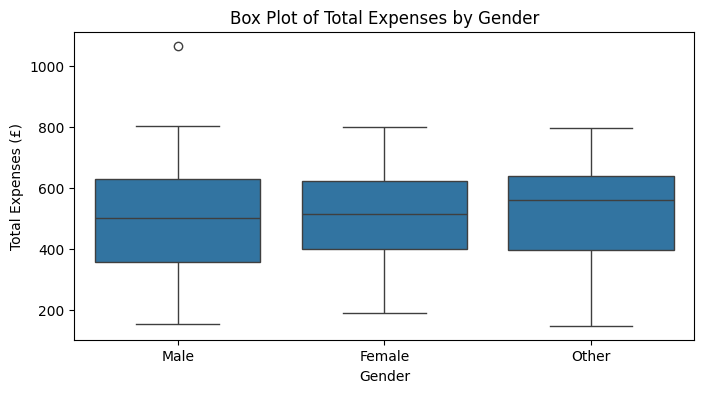

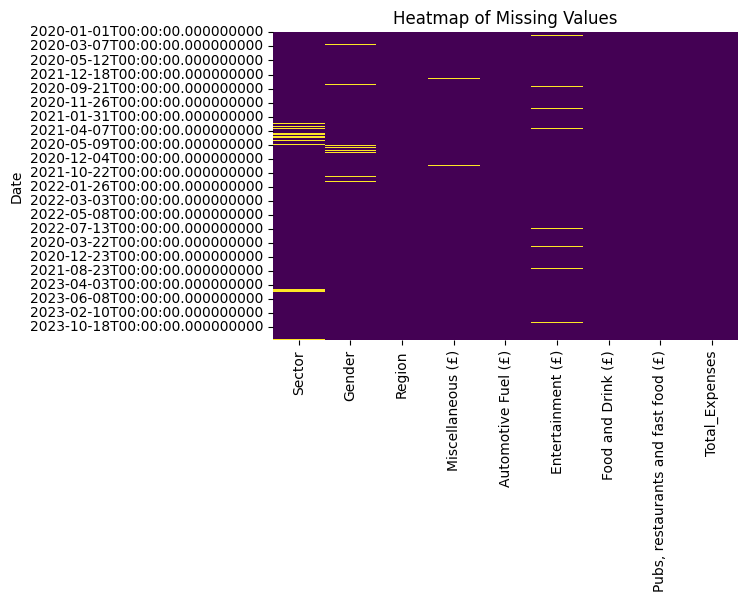

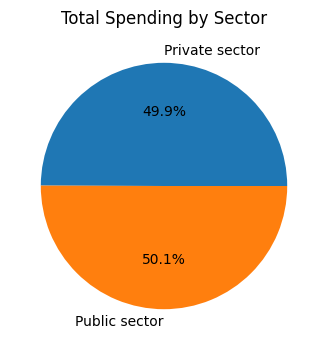

In [ ]:
# Visual Analysis
# Time Series Plot of Total Expenses
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset['Total_Expenses'] = dataset[['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']].sum(axis=1)
plt.figure(figsize=(8, 4))
dataset['Total_Expenses'].plot()
plt.title('Time Series of Total Expenses')
plt.xlabel('Date')
plt.ylabel('Total Expenses (£)')
plt.show()
print("\n\n")

# Bar Plot of Expenses by Category
expenses_by_category = dataset[['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']].mean()
expenses_by_category.plot(kind='bar', figsize=(8, 4))
plt.title('Average Expenses by Category')
plt.xlabel('Category')
plt.ylabel('Average Expense (£)')
plt.show()

print("\n\n")
# Box Plot of Expenses by Gender
plt.figure(figsize=(8, 4))
sns.boxplot(x='Gender', y='Total_Expenses', data=dataset)
plt.title('Box Plot of Total Expenses by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Expenses (£)')
plt.show()
print("\n\n")

# Heatmap of Missing Values
plt.figure(figsize=(6, 4))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()
print("\n\n")

# Pie Chart of Sector-wise Spending
sector_spending = dataset.groupby('Sector')['Total_Expenses'].sum()
sector_spending.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 4))
plt.title('Total Spending by Sector')
plt.ylabel('')
plt.show()
print("\n\n")




```
# This is formatted as code
```

#Data Preprocessing


> Fill Missing Values


> Encoding Categorical Features


> Removing Outliers









In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Fill missing values for numerical features
imputer = SimpleImputer(strategy='median')
dataset[['Entertainment (£)','Miscellaneous (£)']] = imputer.fit_transform(dataset[['Miscellaneous (£)','Entertainment (£)']])

# One-Hot encoding categorical features
categorical_features = ['Sector', 'Gender', 'Region']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(dataset[categorical_features])
encoded_features = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

numerical_features = dataset.drop(columns=categorical_features)

# Reset indices before concatenation
numerical_features.reset_index(drop=True, inplace=True)
encoded_features.reset_index(drop=True, inplace=True)

# Concat all features
dataset = pd.concat([encoded_features, numerical_features], axis=1)

# Remove outliers in 'Automotive Fuel (£)' using IQR
Q1 = dataset['Automotive Fuel (£)'].quantile(0.25)
Q3 = dataset['Automotive Fuel (£)'].quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset['Automotive Fuel (£)'] < (Q1 - 1.5 * IQR)) | (dataset['Automotive Fuel (£)'] > (Q3 + 1.5 * IQR)))]



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(




```
# This is formatted as code
```
#Supervised ML: Prediction




> Scaling Numerical Features


> Lasso Regression



Mean Squared Error: 83.68986066876333



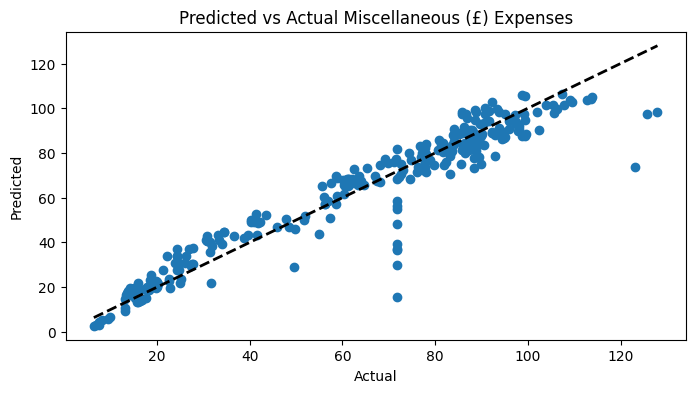

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

''' NOTE: 'Date' feature is already not there in preprocessed dataset '''

# Feaures and target variable
X = dataset.drop(columns=['Miscellaneous (£)'])
y = dataset['Miscellaneous (£)']

# Spliting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying Lasso Regression
lasso = Lasso(alpha=0.15)
lasso.fit(X_train, y_train)

# Predicting and evaluating
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n")

# Ploting predicted vs actual values
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Miscellaneous (£) Expenses')
plt.show()


#Supervised ML: Classification


Accuracy: 0.6382488479262672
Confusion Matrix:
[[277   1]
 [156   0]]


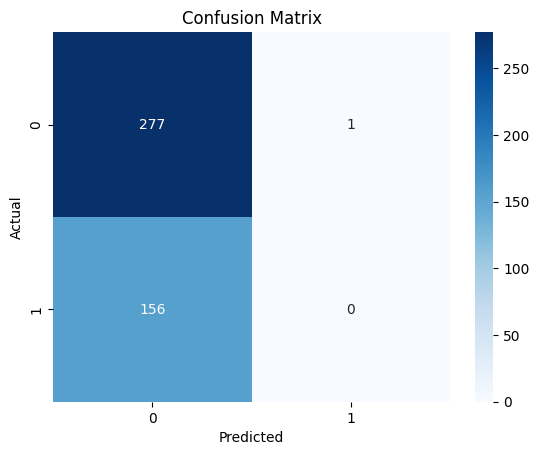

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
df_classification = dataset[['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)', 'Gender_Male']]
X_classification = df_classification.drop(columns=['Gender_Male'])
y_classification = df_classification['Gender_Male']  # Assuming Male = 1, Female = 0

# Spliting data into training and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, shuffle=True)

# Applying Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_clf, y_train_clf)

# Predicting and evaluating
y_pred_clf = logreg.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#Unsupervised ML Algorithm: Clustering



> Using Elbow method to find optimal number of clusters


> Using K-Means to find N-Clusters






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

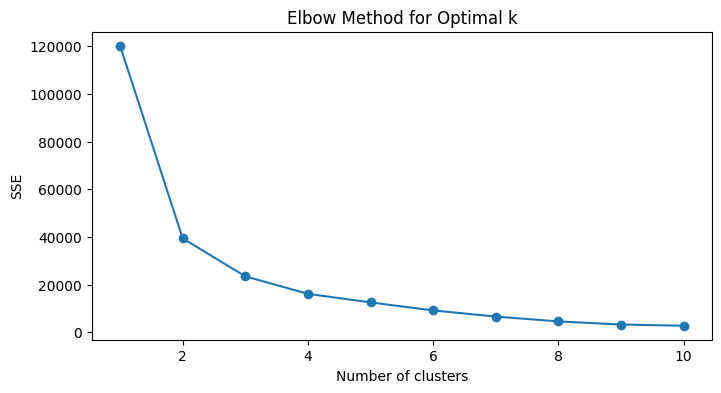

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


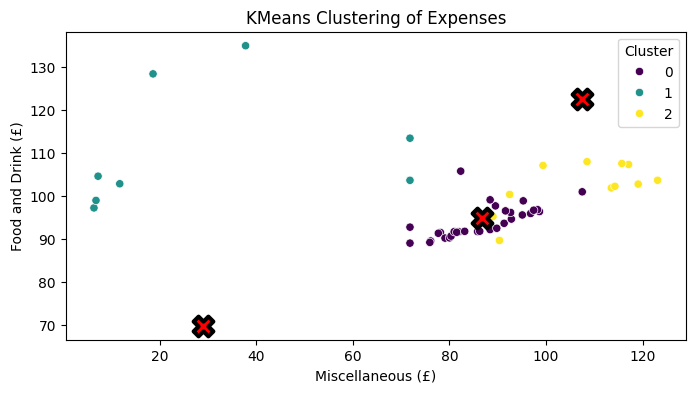

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting first 50 tuples and relevant features
dataset_clstr = dataset.head(50)[['Miscellaneous (£)', 'Automotive Fuel (£)', 'Entertainment (£)', 'Food and Drink (£)', 'Pubs, restaurants and fast food (£)']]

# Determine optimal number of clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_clstr)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

'''NOTE: In the graph below, it can be seen that, with 3 clusters we've got the elbow.'''

kmeans = KMeans(n_clusters=3)
dataset_clstr['Cluster'] = kmeans.fit_predict(dataset_clstr)

# Cluster centroids
centroids = kmeans.cluster_centers_

# Ploting clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Miscellaneous (£)', y='Food and Drink (£)', hue='Cluster', data=dataset_clstr, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, linewidths=3, edgecolor='k')
plt.title('KMeans Clustering of Expenses')
plt.xlabel('Miscellaneous (£)')
plt.ylabel('Food and Drink (£)')
plt.show()
